# About Dataset
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in London UK in 2022.

# Goals

In my work I wanted to find answers on the following questions:

- Are there any significant correlation between quantitative metrics?
- What are the most popular room types?
- What are the most popular neighbourhoods?
- How does the price change depending on room type and neighbourhood?
- How does the number of reviews change depending on room type and neighbourhood?
- What type of property dominates in each neighbourhood?
- How does the availability change depending on room type and neighbourhood?
- How does the hosts' listings count change depending on room type and neighbourhood?
- How many hosts have different types of property?

# Preparation

In [1]:
# First of all, import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import Image

In [2]:
original_df = pd.read_csv('kaggle_london_airbnb.csv')

# I always work with copies of original datasets.
df = original_df.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69351 non-null  object 
 6   latitude                        69351 non-null  float64
 7   longitude                       69351 non-null  float64
 8   room_type                       69351 non-null  object 
 9   price                           69351 non-null  int64  
 10  minimum_nights                  69351 non-null  int64  
 11  number_of_reviews               69351 non-null  int64  
 12  last_review                     

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


I'll delete some columns that aren't useful for my analysis.

There are ***neighbouhood_group*** and ***license***, as these two columns are empty.

Later I would like to learn how to create beautiful maps for data visualization. But now I will use only neighbourhood names for the analysis, so I'll delete ***latitude*** and ***longitude***, too.

Also I'll delete ***host_name***. This information could be useful, if I wanted to check if host's gender has influence on occupancy. But now I'll use only ***host_id*** to identify hosts.

Finally, there are three similar metrics - ***reviews_per_month***, ***number_of_reviews*** and ***number_of_reviews_ltm***. I'll keep only the last one. In my opinion, it's more appropriate because it shows number of reviews for the same period of time (last 12 months). And in ***reviews_per_month*** there are almost 17 000 empty values.

In [4]:
df.drop(['host_name', 'neighbourhood_group', 'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'license'], 
        axis=1, inplace=True)

# Also, I will change the type of data for last-review from object to datetime.
df['last_review'] = pd.to_datetime(df['last_review'])

df.head()

,id,name,host_id,neighbourhood,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,106332,"Lovely large room, Bethnal Green",264345,Tower Hamlets,Private room,55,3,2016-06-10,1,74,0
1,13913,Holiday London DB Room Let-on going,54730,Islington,Private room,50,1,2022-07-15,2,343,9
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Tower Hamlets,Entire home/apt,90,5,2022-01-04,1,222,1
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Islington,Private room,180,4,2022-09-02,5,236,20
4,284603,Notting Hill church stay in Heaven!,1481851,Kensington and Chelsea,Entire home/apt,297,14,2022-07-04,1,180,2


# Exploratory data analysis

### What are the most popular room types?

In [5]:
df['room_type'].value_counts()

Entire home/apt    41224
Private room       27479
Shared room          404
Hotel room           244
Name: room_type, dtype: int64

Two categories - ***Entire home/apt*** (41,224 listings) and ***Private room*** (27,479 listings) - dominate the market, while ***Shared room*** (404 listings) and ***Hotel room*** (244 listings) aren't popular.

### What are the most popular neighbourhoods?

In [6]:
df['neighbourhood'].value_counts()

Westminster               7763
Tower Hamlets             5595
Hackney                   5168
Camden                    4707
Kensington and Chelsea    4612
Southwark                 3968
Islington                 3790
Lambeth                   3719
Wandsworth                3473
Hammersmith and Fulham    2996
Brent                     2068
Lewisham                  2016
Haringey                  1898
Newham                    1682
Barnet                    1611
Ealing                    1553
Greenwich                 1514
Waltham Forest            1322
Merton                    1114
Richmond upon Thames      1108
Hounslow                  1078
Croydon                   1066
Hillingdon                 714
Redbridge                  669
Enfield                    617
Kingston upon Thames       609
Bromley                    594
Harrow                     444
Barking and Dagenham       433
City of London             424
Bexley                     411
Havering                   329
Sutton  

It would be more clear to represent the quantity of listings by neighbourhoods on a graph.

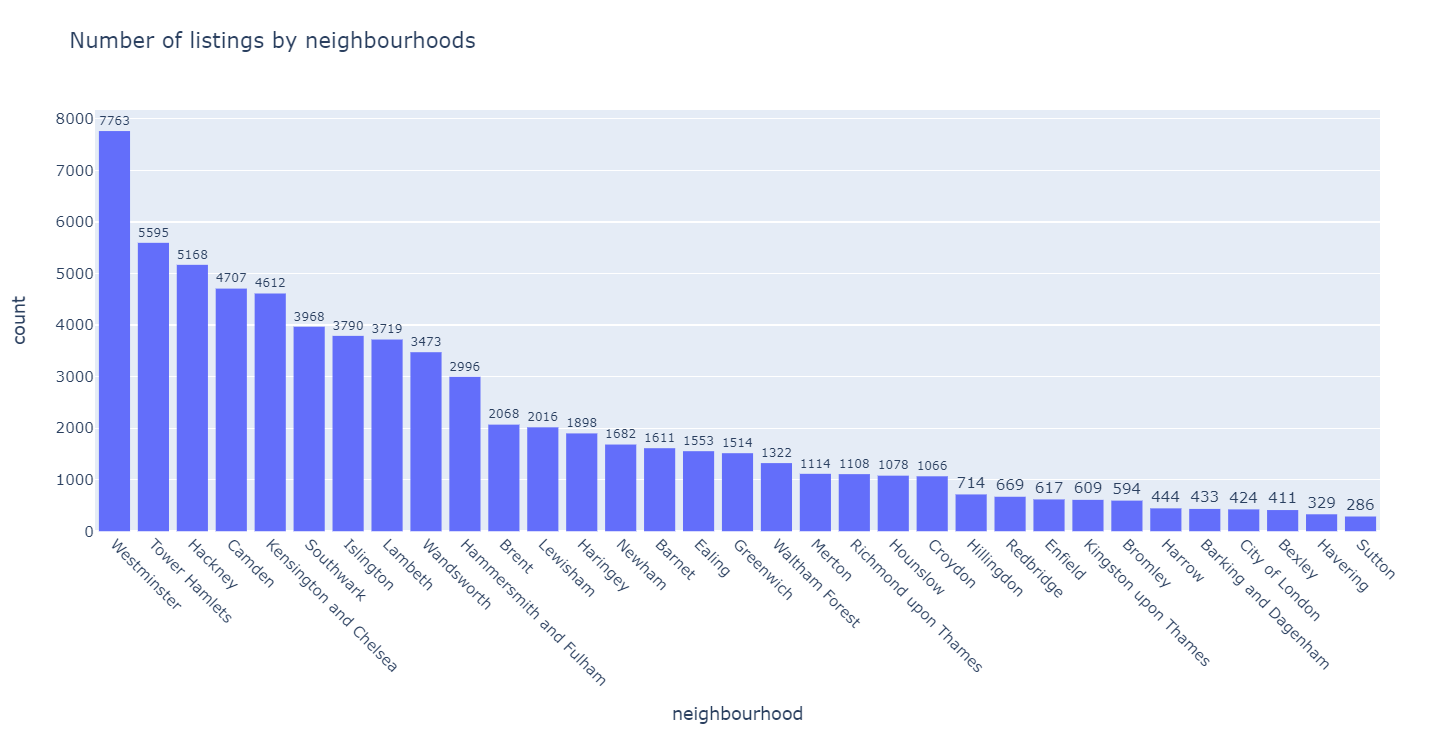

In [7]:
fig = px.histogram(
    df,
    x='neighbourhood',
    text_auto=True,
    title='Number of listings by neighbourhoods',
    height=600
    )
fig.update_xaxes(
    categoryorder='total descending',
    tickangle=45
    )
fig.update_traces(textposition='outside')

#fig.show()
Image('number_listings_neighbourhood.png')

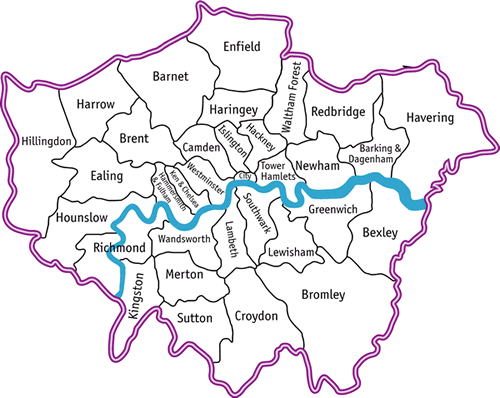

In [8]:
Image('london_neighbourhoods_map.png')

No surprise that the most popular neighboorhoods are located in the centre of London. The confident leader is Westminster (7763 listings). The only exception is the City of London (424 listings) because it is the smallest neighbourhood and there you can't find many residential properties. The least popular is Sutton (286 listings).

### Are there any significant correlation between quantitative metrics?

In [9]:
# For the start, a closer look at the data.
# Values for id and host_id will have no sense, so I don't want to see them.
df_without_id = df.drop(['id','host_id'], axis=1)

df_without_id.describe()

,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000
mean,177.208822,5.997505,11.987498,108.520266,4.734438
std,412.823024,25.709514,37.148839,132.821088,12.032502
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,1.000000,0.000000,0.000000
50%,100.000000,2.000000,1.000000,32.000000,0.000000
75%,180.000000,4.000000,4.000000,228.000000,5.000000
max,25000.000000,1125.000000,285.000000,365.000000,660.000000


For all categories we can see a significant difference between average and median values. It means that values of small share of listings can **distort the overall picture**.

For example, the average price is 177 pounds/night but 50% of listings are cheaper than 100 pounds/night. The reason of this disproportion is that there are some very expensive property (maximum price is 25,000 pounds/night).

That's why I will analyze median values instead of average where it's more appropriate.

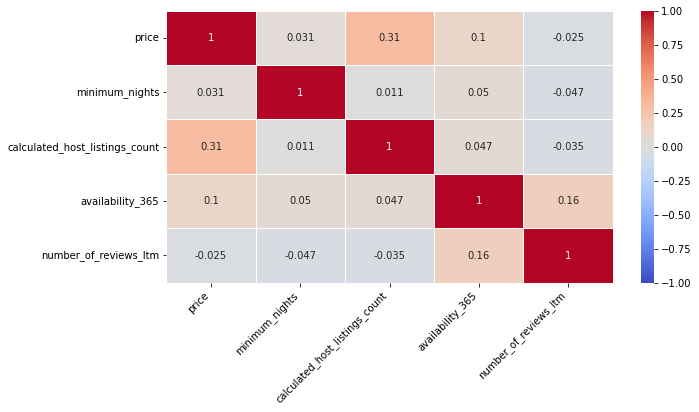

In [10]:
# Finally, let's check if there is correlation between quantitative data.
df_corr = df_without_id.corr()

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, center= 0, linewidths=1, cmap='coolwarm')
plt.xticks(rotation=45, ha='right');

As you can see above, there's no significant correlation between data.

### How does the price change depending on room type?

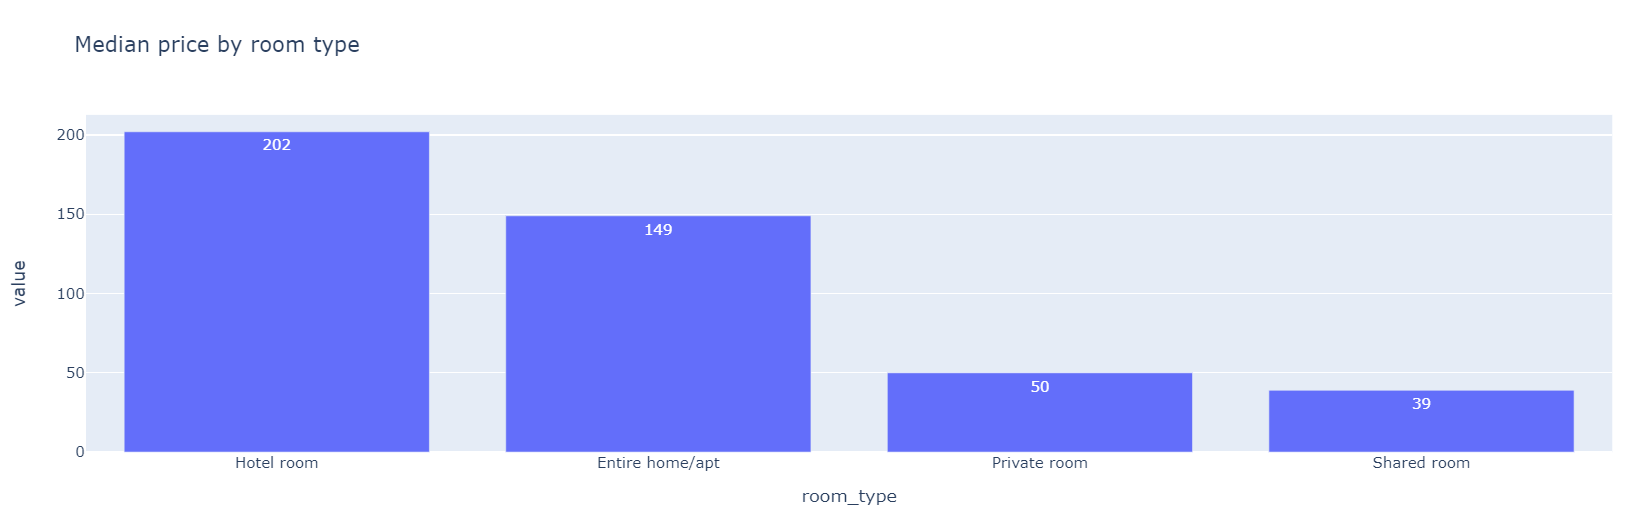

In [11]:
# Let's look at how the median price depends on the type of property.
median_price_by_room_type = df.pivot_table(
    values='price',
    index='room_type',
    aggfunc='median',
    fill_value=0
).sort_values(by='price', ascending=False)


fig = px.bar(
    median_price_by_room_type,
    text_auto=True,
    title='Median price by room type'
)

#fig.show()
Image('median_price_room.png')

As you remember, ***Shared room*** and ***Hotel room*** are significantly less popular than the other two categories. I suppose that it can be partly explained by their price.

Usually hotel rooms (202 pounds/night) are more expensive than entire homes/apartments (149 pounds/night). Also, the latter can be a more advantageous option (especially, in terms of price per person) for a group of travelers - friends or family. 

As for shared rooms, they are clearly the cheapest - median price 39 pounds/night against 50 pounds/night for private rooms. But I suppose that a lot of people prefer to pay a little bit more to have private space. Anyway, even with the lowest price there aren't many such listings on the market. 

### How does the price change depending on neighbourhood?

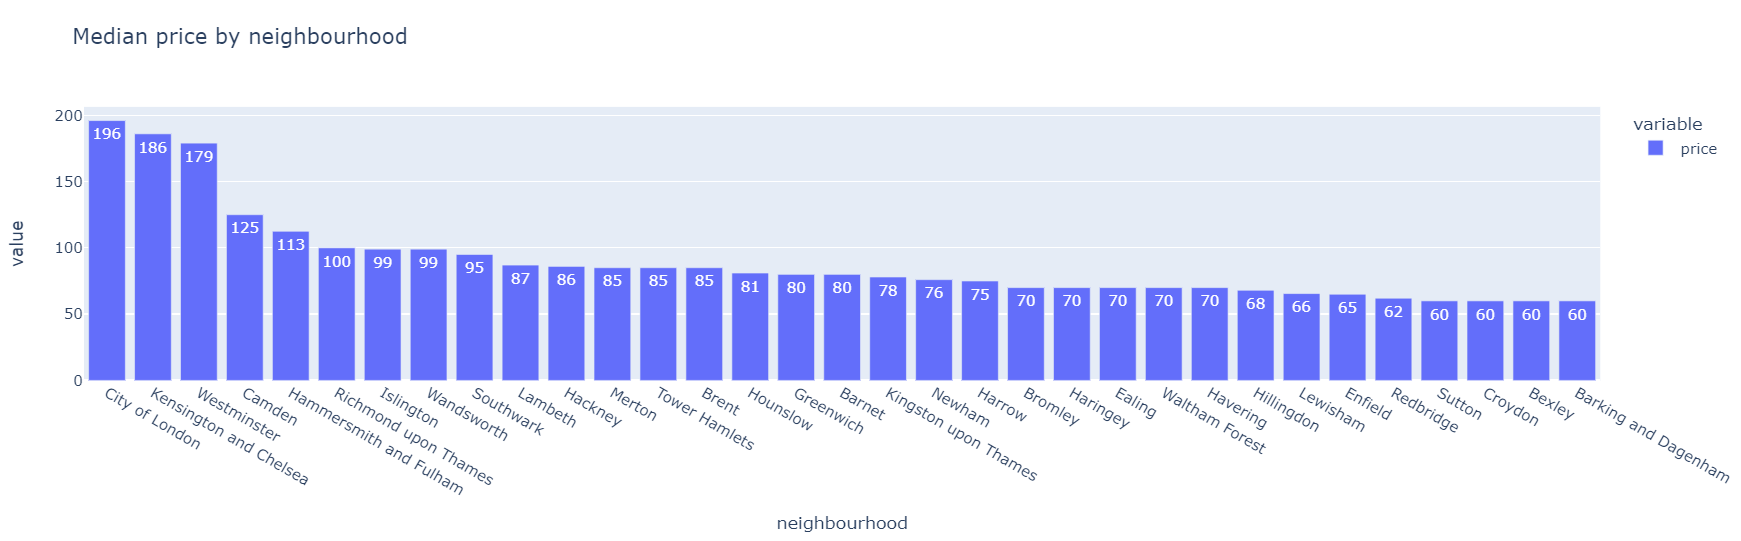

In [12]:
# Let's look at how the median price depends on the neighbourhood.
median_price_by_neighbourhood = df.pivot_table(
    index='neighbourhood',
    values='price',
    aggfunc='median',
    fill_value=0
).sort_values(by='price', ascending=False)


fig = px.bar(
    median_price_by_neighbourhood,
    text_auto='d',
    title='Median price by neighbourhood'
)

#fig.show()
Image('median_price_neighbourhood.png')

The most central neighbourhoods are on top in terms of price, like it was with the distribution of quantity of listings by the neighbourhoods. But then we could see clearly the leader and Top-10 neighbourhoods. Let's look how it will be this time.

There are three much more expensive neighbourhoods than the others: City of London (196 pounds/night), Kensigton and Chelsea (186 pounds/night), Westminster (179 pounds/night). 

Below Top-3 the difference is rather smooth. 

Also, there are only five neighbourhoods where the median price is higher than those for the whole London (100 pounds/night). So there are a lot of options to save traveler's budget.

### How does the number of reviews change depending on neighbourhood?

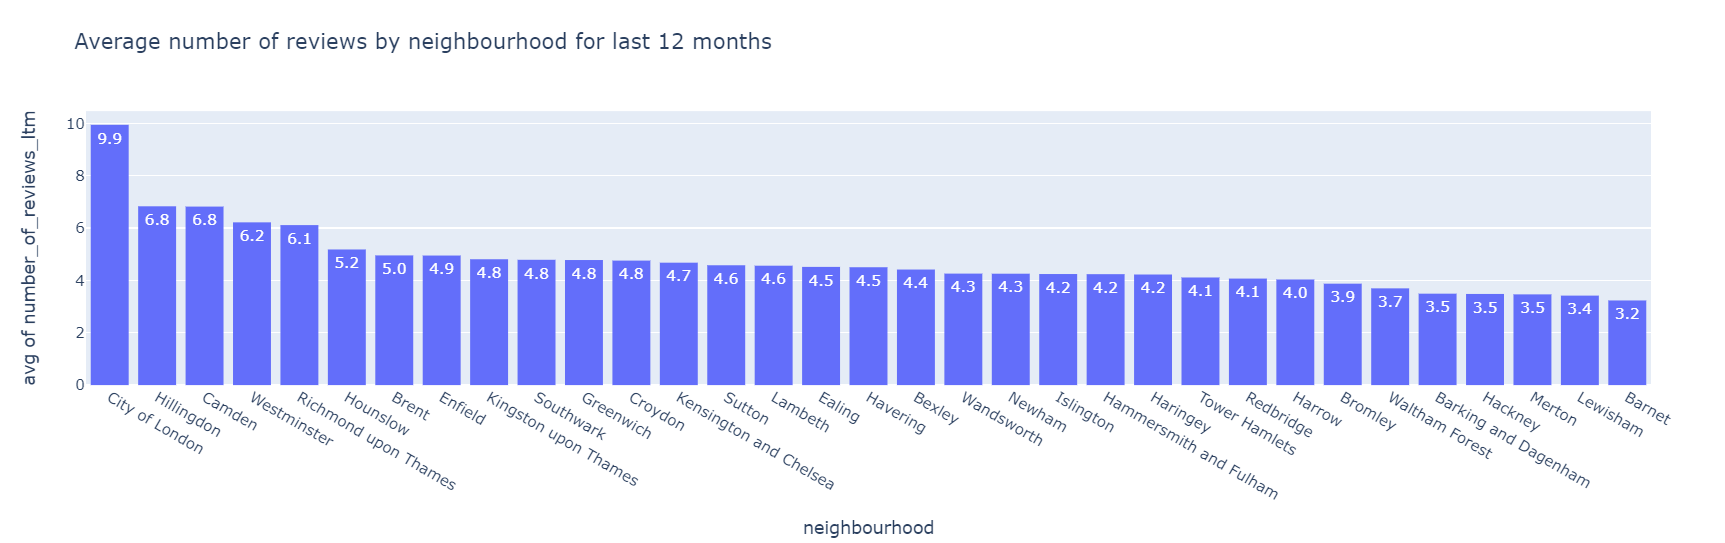

In [13]:
fig = px.histogram(
    df, 
    x='neighbourhood', 
    y='number_of_reviews_ltm',
    histfunc='avg',
    text_auto='.1f',
    title='Average number of reviews by neighbourhood for last 12 months'
)
fig.update_xaxes(categoryorder='total descending')

#fig.show()
Image('average_reviews_neighbourhood.png')

There are two surprising results for me.

1. City of London is the clear leader with almost 10 reviews/listing while it has only 424 listings (4th rank from the end).
2. Hillingdon - another unpopular neighbourhood with only 714 listings - is on the 2nd place with 6.8 reviews/listings.

On the other hand, it can be explained by the fact that more popular neighbourhoods may have many inactive listings without reviews. It can lower average value of the metric.

Unfortunately, we don't have information about character of the reviews, whether they are positive or negative. So we can't evaluate customer satisfaction by these numbers.

### How does the number of reviews change depending on room type?

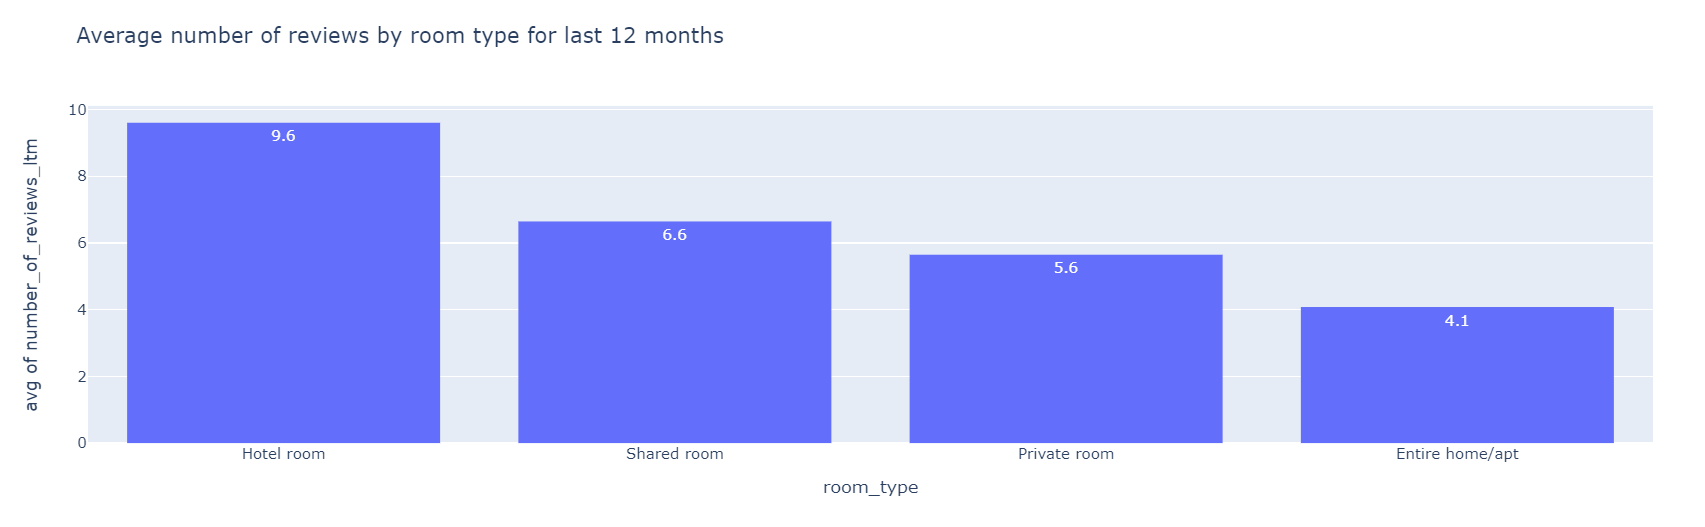

In [14]:
fig = px.histogram(
    df,
    x='room_type',
    y='number_of_reviews_ltm',
    histfunc='avg',
    text_auto='.1f',
    title='Average number of reviews by room type for last 12 months'
)
fig.update_xaxes(categoryorder='total descending')

#fig.show()
Image('average_reviews_room.png')

For the same reason, this result was also a little bit surprising for me at the first sight. 

But the **median value** for number of reviews for last 12 months **for all listings is 0**. 

So apparently the lower values for ***Entire home/apt*** and ***Private room*** are explained by the fact that in these categories there are much more listings with no reviews than for ***Hotel room*** and ***Shared room***.

### What type of property dominates in each neighbourhood?

Let's look where it's easier to find an available property and what type of property it will be.

First of all, I want to know how many properties of each type we can find in each neighbourhood. 

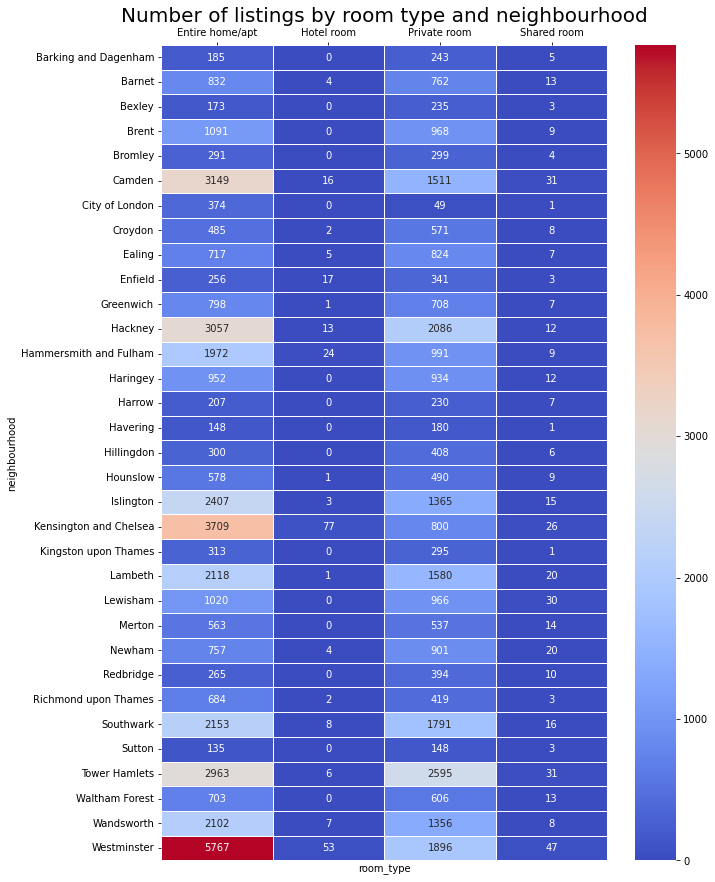

In [15]:
room_type_by_neighbourhood = df.pivot_table(
    index='neighbourhood',
    columns='room_type',
    values='id',
    aggfunc='count',
    fill_value=0
)


fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(
    room_type_by_neighbourhood, 
    annot=True,
    fmt='d', 
    linewidths=1,
    cmap='coolwarm'
)
ax.xaxis.tick_top()
plt.title('Number of listings by room type and neighbourhood', fontsize = 20);

In [16]:
# Let's count number of neighbourhoods where dominates 'Entire home/apt' or 'Private room'
# and number of neighbourhoods without hoel rooms.
entire_count = 0
private_count = 0
equal_count = 0
no_hotel_count = 0

for i in range(len(room_type_by_neighbourhood)):
    if room_type_by_neighbourhood['Entire home/apt'][i] > room_type_by_neighbourhood['Private room'][i]:
        entire_count += 1
    elif room_type_by_neighbourhood['Entire home/apt'][i] < room_type_by_neighbourhood['Private room'][i]:
        private_count += 1
    else:
        equal_count += 1
        
for i in range(len(room_type_by_neighbourhood)):
    if room_type_by_neighbourhood['Hotel room'][i] == 0:
        no_hotel_count += 1
        
print(f'Number of neighbourhoods where dominates Entire home/apt - {entire_count}')
print(f'Number of neighbourhoods where dominates Private room - {private_count}')
print(f'Number of neighbourhoods with equal quantity of Entire home/apt and  Private room - {equal_count}')
print(f'Number of neighbourhoods without Hotel room - {no_hotel_count}')

Number of neighbourhoods where dominates Entire home/apt - 21
Number of neighbourhoods where dominates Private room - 12
Number of neighbourhoods with equal quantity of Entire home/apt and  Private room - 0
Number of neighbourhoods without Hotel room - 15


As you remember, ***Entire home/apt*** (41224 listings) and ***Private room*** (27479 listings) dominate the market. While in general there are much more ***Entire home/apt*** listings, this category is the leader only in 21 of 33 neighbourhoods. In the other 12 neighbourhoods the leading category is ***Private room***.

Also, there are 15 neighbourhoods without hotel rooms at all.

### How does the availability change depending on room type?

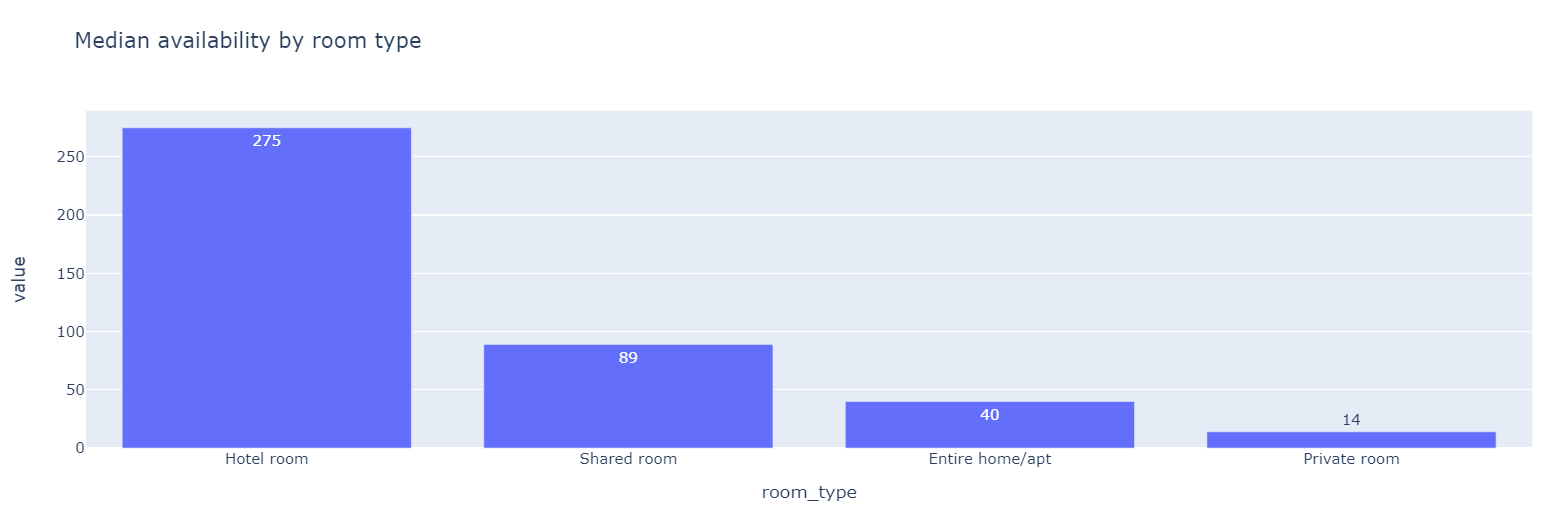

In [17]:
median_availability_by_room_type = df.pivot_table(
    index='room_type',
    values='availability_365',
    aggfunc='median',
    fill_value=0
).sort_values(by='availability_365', ascending=False)


fig = px.bar(
    median_availability_by_room_type,
    text_auto=True,
    title='Median availability by room type'
)

#fig.show()
Image('median_availability_room.png')

In my opinion, these results are reasonable.

Usually hotel rooms are available for booking most days of the year (275 in our case).

If people live in their property, they can't rent entire property or a private room very often. So 50% of entire homes/apartments are available less than 40 days per year, 50% of private rooms - less than 14 days per year.

Shared rooms looks more available. Half of them can be booked more than 89 days per year.

### How does the availability change depending on neighbourhood?

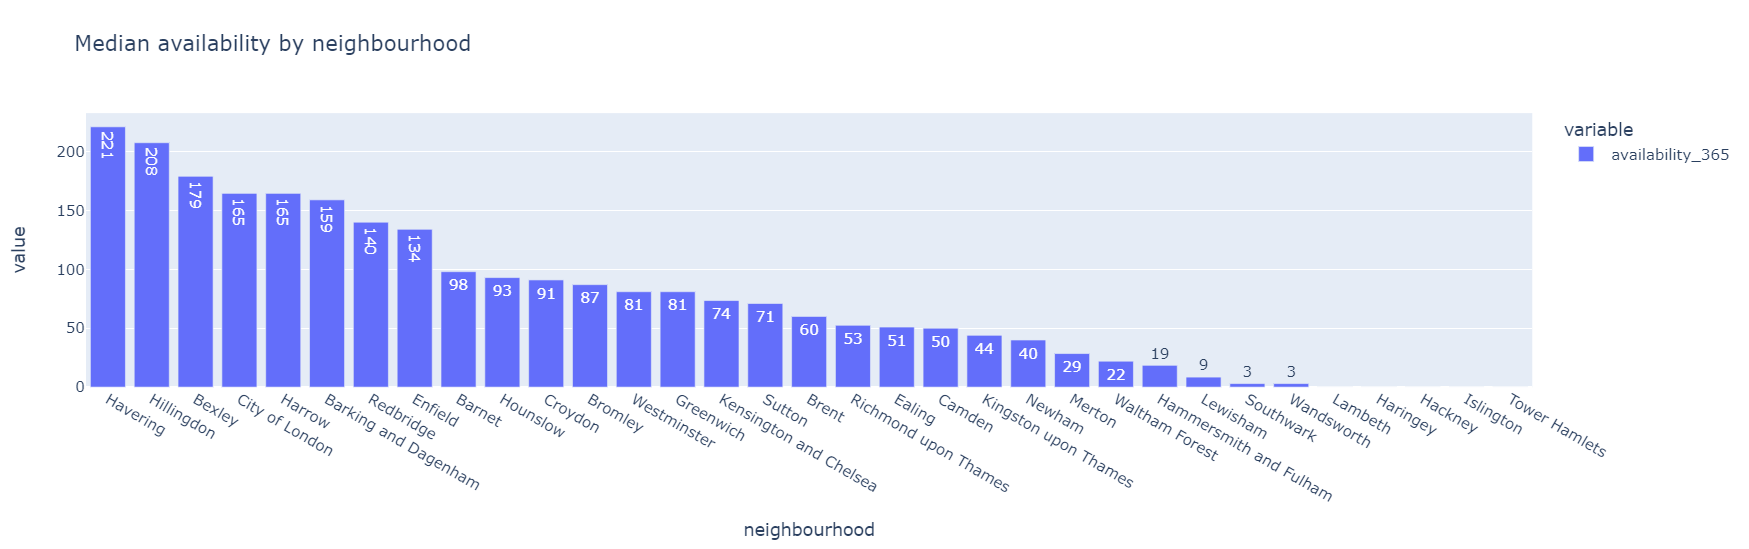

In [18]:
median_availabilty_by_neighbourhood = df.pivot_table(
    index='neighbourhood',
    values='availability_365',
    aggfunc='median',
    fill_value=0
).sort_values(by='availability_365', ascending=False)


fig = px.bar(
    median_availabilty_by_neighbourhood,
    text_auto='d',
    title='Median availability by neighbourhood'
)

#fig.show()
Image('median_availability_neighbourhood.png')

There are five neighbourhoods where 50% of listings aren't available at all. That's rather strange. For example, in Tower Hamlets there are more than 2000 entire homes/apartments and more than 2000 private rooms. Maybe many of these listings aren't active anymore or there's some mistake in data.

Surprisingly, two leaders are Havering and Hillingdon. There aren't hotel rooms which typically are the most available. But 50% of entire homes/apartments (median more than 228 days per year) and private rooms (median more than 172 days per year) in these areas are very available (look at the plot below). So we can suppose that their hosts actively use this property as a source of passive income while they live somewhere else.

These are just two insights. I believe that closer look at availability in each neighbourhood can reveale a lot of intresting information about the structure of Airbnb market in London.

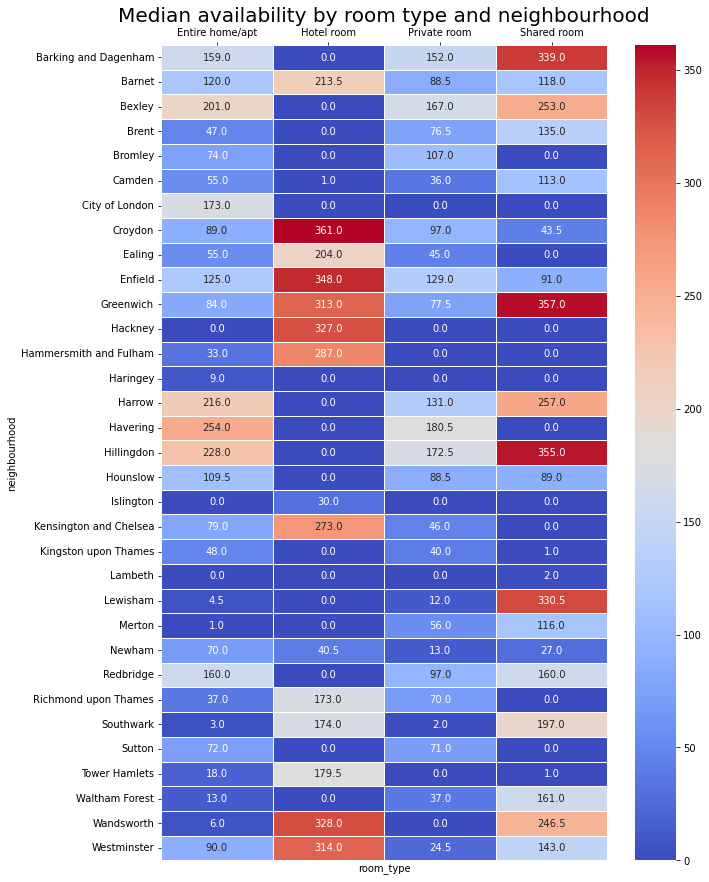

In [19]:
median_availabilty_by_room_and_neighbourhood = df.pivot_table(
    index='neighbourhood',
    columns='room_type',
    values='availability_365',
    aggfunc='median',
    fill_value=0
)


fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(
    median_availabilty_by_room_and_neighbourhood, 
    annot=True,
    fmt='.1f', 
    linewidths=1,
    cmap='coolwarm'
)
ax.xaxis.tick_top()
plt.title('Median availability by room type and neighbourhood', fontsize = 20);

Many zeros in ***Hotel room*** category can be explained by the fact that there are no such listings in many neighbourhoods. Zeros in other categories are less comprehensible. A more detailed analysis is needed to find the reason.

More than 50% ***Shared room*** listings in some peripheral neighbourhoods are available most days of the year. That means that their hosts actively look for an addititional income.

There are only four neighbourhoods for ***Entire home/apt*** listings and no neighbourhoods for ***Private room*** listings where median availability is above 200 days per year.

Also, we can note that in two popular and expensive neighbourhoods - Westminster, Kensington and Chelsea - half of the ***Entire home/apt*** listings are available less than 90 days per year and ***Private room*** listings are available less than 46 days per year. So, it can be easier to find a hotel room if you want to stay there.   

### How does the hosts' listings count change depending on room type?

Above I started to make suggestions about the hosts' portraits. Now let's dive deeper in this field.

In [20]:
median_host_listings_count_by_room_type = df.pivot_table(
    index='room_type',
    values='calculated_host_listings_count',
    aggfunc='median',
    fill_value=0
).sort_values(by='calculated_host_listings_count', ascending=False)

mean_host_listings_count_by_room_type = df.pivot_table(
    index='room_type',
    values='calculated_host_listings_count',
    aggfunc='mean',
    fill_value=0
).sort_values(by='calculated_host_listings_count', ascending=False)

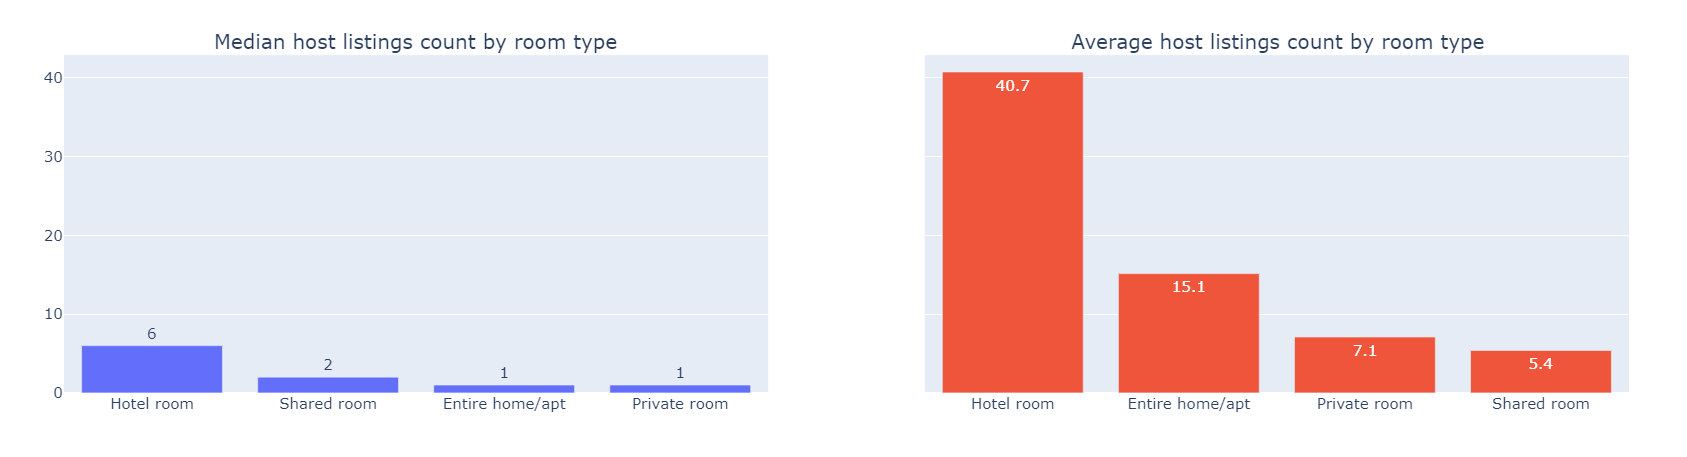

In [21]:
fig = make_subplots(
    rows=1, 
    cols=2, 
    shared_yaxes=True, 
    subplot_titles=("Median host listings count by room type", "Average host listings count by room type")
)

fig.add_trace(
    go.Bar(
        x=median_host_listings_count_by_room_type.index, 
        y=median_host_listings_count_by_room_type['calculated_host_listings_count'],
        showlegend=False,
        text=median_host_listings_count_by_room_type['calculated_host_listings_count'],
        textposition='outside'
    ), 
    1, 1
)

fig.add_trace(
    go.Bar(
        x=mean_host_listings_count_by_room_type.index, 
        y=mean_host_listings_count_by_room_type['calculated_host_listings_count'],
        text=mean_host_listings_count_by_room_type['calculated_host_listings_count'],
        showlegend=False,
        textfont=dict(color='white'),
        textposition='inside',
        texttemplate='%{y:.1f}'
    ), 
    1, 2
)

#fig.show()
Image('host_listings_count.png')

**Most hosts are small players on the market**. Half of ***Entire home/apt*** and ***Private room*** hosts have only 1 listing, half of ***Shared room*** hosts - 2 listings. Even in ***Hotel room*** category 50% of hosts have only 6 listings.

On the other hand, **there are also large players**. That's why average values are much bigger. In ***Hotel room*** category - 40.7 listings/host, in ***Entire home/apt*** - 15.1 listings/host, in ***Private room*** - 7.1 listings/host, in ***Shared room*** - 5.4 listings/host.

**Note!** It doesn't mean that each host has listings only in one category. It's possible that some of them rent different types of property. We can check it.

### How many hosts have different types of property?

In [22]:
# At first we should find hosts of different types of property.
hotel_room_hosts = set()
entire_home_hosts = set()
private_room_hosts = set()
shared_room_hosts = set()

# As we dont't have null values in our dataframe, we can use this loop.
for i in range(len(df['host_id'])):
    if df['room_type'].loc[i] == 'Hotel room':
        hotel_room_hosts.add(df['host_id'].loc[i])
    elif df['room_type'].loc[i] == 'Entire home/apt':
        entire_home_hosts.add(df['host_id'].loc[i])
    elif df['room_type'].loc[i] == 'Private room':
        private_room_hosts.add(df['host_id'].loc[i])
    else:
        shared_room_hosts.add(df['host_id'].loc[i])

In [23]:
# Let's find how many hosts have different types of listings.
print('Entire home/apt hosts count -', len(entire_home_hosts))
print('Private room hosts count - ', len(private_room_hosts))
print('Shared room hosts count - ', len(shared_room_hosts))
print('Hotel room hosts count -', len(hotel_room_hosts))
print('')
print('Only entire home/apt hosts count -', len(
    ((entire_home_hosts.difference(
        hotel_room_hosts)).difference(
            private_room_hosts)).difference(shared_room_hosts)))
print('Only private room hosts count -', len(
    ((private_room_hosts.difference(
        hotel_room_hosts)).difference(
            entire_home_hosts)).difference(shared_room_hosts)))
print('Only shared room hosts count -', len(
    ((shared_room_hosts.difference(
        hotel_room_hosts)).difference(
            entire_home_hosts)).difference(private_room_hosts)))
print('Only hotel room hosts count -', len(
    ((hotel_room_hosts.difference(
        entire_home_hosts)).difference(
            private_room_hosts)).difference(shared_room_hosts)))
print('')
print('Entrire home/apt & Private room hosts count -', len(entire_home_hosts.intersection(private_room_hosts)))
print('Entrire home/apt & Shared room hosts count -', len(entire_home_hosts.intersection(shared_room_hosts)))
print('Entrire home/apt & Hotel room hosts count -', len(entire_home_hosts.intersection(hotel_room_hosts)))
print('Private & Shared room hosts count -', len(private_room_hosts.intersection(shared_room_hosts)))
print('Private & Hotel room hosts count -', len(private_room_hosts.intersection(hotel_room_hosts)))
print('Shared room & Hotel room hosts count -', len(shared_room_hosts.intersection(hotel_room_hosts)))
print('')
print('Entrire home/apt & Private room & Shared room hosts count -', len(
    (entire_home_hosts.intersection(
        private_room_hosts)).intersection(shared_room_hosts)))
print('Entrire home/apt & Private room & Hotel room hosts count -', len(
    (entire_home_hosts.intersection(
        private_room_hosts)).intersection(hotel_room_hosts)))
print('Entrire home/apt & Shared room & Hotel room hosts count -', len(
    (entire_home_hosts.intersection(
        shared_room_hosts)).intersection(hotel_room_hosts)))
print('Private room & Shared room & Hotel room hosts count -', len(
    (hotel_room_hosts.intersection(
        private_room_hosts)).intersection(shared_room_hosts)))

Entire home/apt hosts count - 27326
Private room hosts count -  19940
Shared room hosts count -  308
Hotel room hosts count - 78

Only entire home/apt hosts count - 25007
Only private room hosts count - 17568
Only shared room hosts count - 210
Only hotel room hosts count - 44

Entrire home/apt & Private room hosts count - 2293
Entrire home/apt & Shared room hosts count - 35
Entrire home/apt & Hotel room hosts count - 14
Private & Shared room hosts count - 77
Private & Hotel room hosts count - 25
Shared room & Hotel room hosts count - 2

Entrire home/apt & Private room & Shared room hosts count - 16
Entrire home/apt & Private room & Hotel room hosts count - 7
Entrire home/apt & Shared room & Hotel room hosts count - 0
Private room & Shared room & Hotel room hosts count - 0


More than **91%** of 27,326 ***Entire home/apt*** hosts rent only this type of property.

More than **88%** of 19,940 ***Private room*** hosts rent only this type of property.

More than **68%** of 308 ***Shared room*** hosts rent only this type of property.

More than **56%** of 78 ***Hotel room*** hosts rent only this type of property.

The fact that some ***Hotel room*** hosts rent other types of property (especially, shared room) is unexpected for me. Their share is significant - more than 43% (34 of 78 hosts).

**2293** hosts rent ***Entire home/apt*** and ***Private room*** listings.

Other scenarios are relatively rare.

### How does the hosts' listings count change depending on neighbourhood?

In [24]:
mean_host_listings_by_neighbourhood = df.pivot_table(
    index='neighbourhood',
    values='calculated_host_listings_count',
    aggfunc='mean',
    fill_value=0
).sort_values(by='calculated_host_listings_count', ascending=False)

median_host_listings_by_neighbourhood = df.pivot_table(
    index='neighbourhood',
    values='calculated_host_listings_count',
    aggfunc='median',
    fill_value=0
).sort_values(by='calculated_host_listings_count', ascending=False)

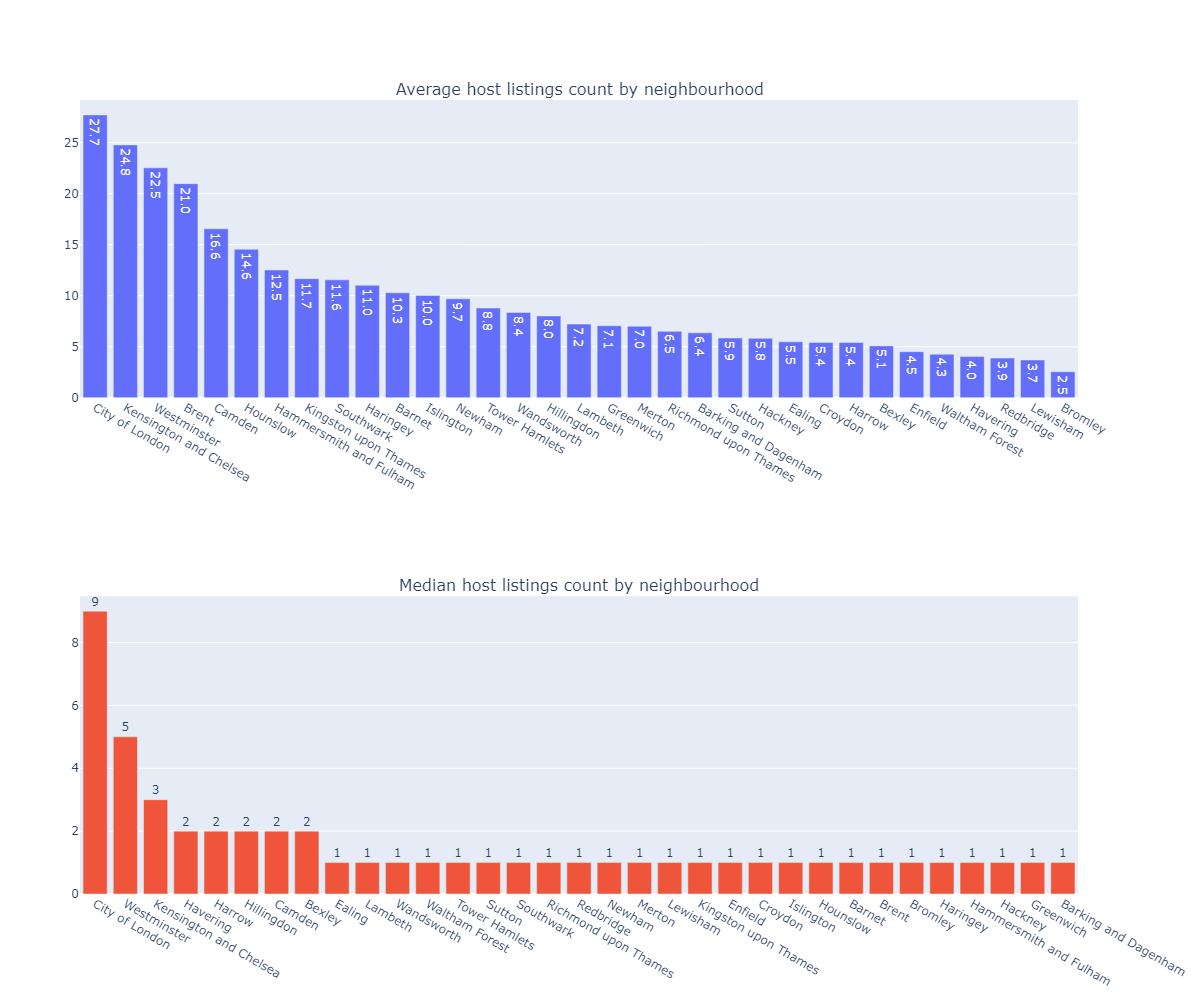

In [25]:
fig = make_subplots(
    rows=2, 
    cols=1, 
    shared_yaxes=True, 
    subplot_titles=("Average host listings count by neighbourhood", "Median host listings count by neighbourhood")
)

fig.update_layout(
    autosize=False,
    width=1200,
    height=1000
)

fig.add_trace(
    go.Bar(
        x=mean_host_listings_by_neighbourhood.index, 
        y=mean_host_listings_by_neighbourhood['calculated_host_listings_count'],
        showlegend=False,
        text=mean_host_listings_by_neighbourhood['calculated_host_listings_count'],
        textfont=dict(color='white'),
        textposition='inside',
        texttemplate='%{y:.1f}'
    ), 
    1, 1
)

fig.add_trace(
    go.Bar(
        x=median_host_listings_by_neighbourhood.index, 
        y=median_host_listings_by_neighbourhood['calculated_host_listings_count'],
        showlegend=False,
        text=median_host_listings_by_neighbourhood['calculated_host_listings_count'],
        textposition='outside'
    ), 
    2, 1
)

#fig.show()
Image('host_listings_neighbourhood.png')

In [26]:
df['calculated_host_listings_count'].describe()

count    69351.000000
mean        11.987498
std         37.148839
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        285.000000
Name: calculated_host_listings_count, dtype: float64

As we already know, there are many small players on the market. Only 25% of hosts have more than 4 listings. So it's not surprise that median values for host listings count by neighbourhood are much smaller than the average values. There are only **eight neighourhoods where the median is more than 1 listngs/host** and only **three neighbourhoods where the median is above 2 listings/host** (City of London, Westminster, Kensingtom and Chelsea).

**Note!** It doesn't mean than a host can have listings only in one neighbourhood. Hosts can have listings in different neighbourhoods. 

The smallest average value is 2.5 listings/host in Bromley. It means that **there is, at least, one big player in each neighbourhood**.

What is also important: these plots clearly show the **most popular neigbourhoods for big players**. Generally, they have good location. They are central like City of London, Kensingtom and Chelsea, Westminster, Brent, Hamden, etc. Or they are close to Heathrow Airport like Hounslow and Kingston upon Thames.

# Summary

Here I will repeat the answers on the following questions. If all of them are in the same place, it will be easier for you to see a global picture.

### Are there any significant correlation between quantitative metrics?

There's **no significant correlation** between data.

Also, for all categories we can see a significant difference between average and median values. It means that values of small share of listings can **distort the overall picture**. For example, the average price is 177 pounds/night but 50% of listings are cheaper than 100 pounds/night. The reason of this disproportion is that there are some very expensive property (maximum price is 25,000 pounds/night). That's why I analyzed median values instead of average where it was more appropriate.

### What are the most popular room types?

Two categories - ***Entire home/apt*** (41,224 listings) and ***Private room*** (27,479 listings) - dominate the market, while ***Shared room*** (404 listings) and ***Hotel room*** (244 listings) aren't popular.

### What are the most popular neighbourhoods?

No surprise that **the most popular neighboorhoods are located in the centre** of London. The confident leader is Westminster (7763 listings). The only exception is the City of London (424 listings) because it is the smallest neighbourhood and there you can't find many residential properties. The least popular is Sutton (286 listings).

### How does the price change depending on room type and neighbourhood?

***Shared room*** and ***Hotel room*** are significantly less popular than the other two categories. I suppose that it can be partly explained by their price. Usually **hotel rooms (median price is 202 pounds/night)** are more expensive than **entire homes/apartments (149 pounds/night)**. Also, the latter can be a more advantageous option (especially, in terms of price per person) for a group of travelers - friends or family. **Shared rooms are clearly the cheapest - median price 39 pounds/night** against **50 pounds/night for private rooms**. But I suppose that a lot of people prefer to pay a little bit more to have private space. Anyway, even with the lowest price there aren't many such listings on the market.

The most central neighbourhoods are on top in terms of price, like it was with the distribution of quantity of listings by the neighbourhoods. But then we could see clearly the leader and Top-10 neighbourhoods. Now there are three much more expensive neighbourhoods than the others: **City of London (196 pounds/night), Kensigton and Chelsea (186 pounds/night), Westminster (179 pounds/night)**. Below Top-3 the difference is rather smooth. Also, there are **only five neighbourhoods where the median price is higher than those for the whole London (100 pounds/night)**. So there are a lot of options to save traveler's budget.

### How does the number of reviews change depending on room type and neighbourhood?

There are two surprising results for me.

1. City of London is the clear leader with almost 10 reviews/listing while it has only 424 listings (4th rank from the end).
2. Hillingdon - another unpopular neighbourhood with only 714 listings - is on the 2nd place with 6.8 reviews/listings.

On the other hand, it can be explained by the fact that more popular neighbourhoods may have many inactive listings without reviews. It can lower average value of the metric. It seems to be true, the **median value** for number of reviews for last 12 months **for all listings is 0**. 

So apparently the lower values for ***Entire home/apt*** and ***Private room*** are also explained by the fact that in these categories there are much more listings with no reviews than for ***Hotel room*** and ***Shared room***.

Unfortunately, we don't have information about character of the reviews, whether they are positive or negative. So we can't evaluate customer satisfaction by these numbers.

### What type of property dominates in each neighbourhood?

As you remember, ***Entire home/apt*** (41224 listings) and ***Private room*** (27479 listings) dominate the market. While in general there are much more ***Entire home/apt*** listings, this category is the leader only in 21 of 33 neighbourhoods. In the other 12 neighbourhoods the leading category is ***Private room***. Also, there are 15 neighbourhoods without hotel rooms at all.

### How does the availability change depending on room type and neighbourhood?

Usually hotel rooms are available for booking most days of the year (median is 275 days per year). If people live in their property, they can't rent entire property or a private room very often. So 50% of entire homes/apartments are available less than 40 days per year, 50% of private rooms - less than 14 days per year. Shared rooms looks more available. Half of them can be booked more than 89 days per year.

There are five neighbourhoods where 50% of listings aren't available at all. That's rather strange. For example, in Tower Hamlets there are more than 2000 entire homes/apartments and more than 2000 private rooms. Maybe many of these listings aren't active anymore or there's some mistake in data.

Surprisingly, two leaders are Havering and Hillingdon. There aren't hotel rooms which typically are the most available. But 50% of entire homes/apartments (median more than 228 days per year) and private rooms (median more than 172 days per year) in these areas are very available. So we can suppose that their hosts actively use this property as a source of passive income while they live somewhere else.

More than 50% ***Shared room*** listings in some peripheral neighbourhoods are available most days of the year. That means that their hosts actively look for an addititional income.

There are only four neighbourhoods for ***Entire home/apt*** listings and no neighbourhoods for ***Private room*** listings where median availability is above 200 days per year.

Also, we can note that in two popular and expensive neighbourhoods - Westminster, Kensington and Chelsea - half of the ***Entire home/apt*** listings are available less than 90 days per year and ***Private room*** listings are available less than 46 days per year. So, it can be easier to find a hotel room if you want to stay there.   

I believe that closer look at availability in each neighbourhood can reveale a lot of intresting information about the structure of Airbnb market in London.

### How does the hosts' listings count change depending on room type and neighbourhood?

**Most hosts are small players on the market**. Half of ***Entire home/apt*** and ***Private room*** hosts have only 1 listing, half of ***Shared room*** hosts - 2 listings. Even in ***Hotel room*** category 50% of hosts have only 6 listings. On the other hand, **there are also large players**. That's why average values are much bigger. In ***Hotel room*** category - 40.7 listings/host, in ***Entire home/apt*** - 15.1 listings/host, in ***Private room*** - 7.1 listings/host, in ***Shared room*** - 5.4 listings/host.

**Note!** It doesn't mean that each host has listings only in one category. Some of them rent different types of property. Below is detailed information about this.

As we already know, there are many small players on the market. Only 25% of hosts have more than 4 listings. So it's not surprise that median values for host listings count by neighbourhood are much smaller than the average values. There are only **eight neighourhoods where the median is more than 1 listngs/host** and only **three neighbourhoods where the median is above 2 listings/host** (City of London, Westminster, Kensingtom and Chelsea).

**Note!** Again, it doesn't mean than a host can have listings only in one neighbourhood. Hosts can have listings in different neighbourhoods. 

The smallest average value is 2.5 listings/host in Bromley. It means that **there is, at least, one big player in each neighbourhood**.

What is also important: the plots clearly show the **most popular neigbourhoods for big players**. Generally, they have good location. They are central like City of London, Kensingtom and Chelsea, Westminster, Brent, Hamden, etc. Or they are close to Heathrow Airport like Hounslow and Kingston upon Thames.

### How many hosts have different types of property?

More than **91%** of 27,326 ***Entire home/apt*** hosts rent only this type of property.

More than **88%** of 19,940 ***Private room*** hosts rent only this type of property.

More than **68%** of 308 ***Shared room*** hosts rent only this type of property.

More than **56%** of 78 ***Hotel room*** hosts rent only this type of property.

The fact that some ***Hotel room*** hosts rent other types of property (especially, shared room) is unexpected for me. Their share is significant - more than 43% (34 of 78 hosts).

**2293** hosts rent ***Entire home/apt*** and ***Private room*** listings.

Other scenarios are relatively rare.